# Car Price Analysis and Predictions

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading dataset

In [2]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.shape

(17966, 9)

In [4]:
# Checking basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


### Data Cleaning

In [5]:
#Checking for missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

The dataset has no missing values, which is excellent. This allows us to proceed without needing to handle missing data.

#### Standardizing

In [6]:
# numerical features 
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform them
df[numerical_features] = scaler.fit_transform(df[numerical_features])


#### One Hot Encoding

In [7]:
dataset_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'])
dataset_encoded.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,12000,-0.380998,0.591358,-0.020442,-0.811386,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.552866,14000,-0.733359,0.591358,-0.020442,-0.811386,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.065128,13000,-0.560132,0.591358,-0.020442,-0.811386,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1.040605,17500,-0.662640,0.510727,-1.738890,0.345070,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.040605,16500,-1.123724,0.510727,-0.909294,-0.811386,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
#checking summary statistics
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,1.796600e+04,17966.000000,1.796600e+04,1.796600e+04,1.796600e+04,1.796600e+04
mean,3.510712e-14,12279.534844,8.859043e-17,9.491832e-18,7.023956e-16,-1.787628e-16
std,1.000028e+00,4741.343657,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-1.017738e+01,495.000000,-1.199784e+00,-1.827578e+00,-3.664737e+00,-3.124299e+00
25%,-4.226108e-01,8999.000000,-6.869322e-01,-1.343791e+00,-5.537532e-01,-8.113862e-01
50%,6.512772e-02,11291.000000,-2.629538e-01,5.107268e-01,9.807205e-02,-3.488036e-01
75%,5.528662e-01,15299.000000,3.953155e-01,5.107268e-01,7.696495e-01,3.450702e-01
max,2.103788e+01,54995.000000,7.923442e+00,7.525642e+00,1.421108e+01,8.440265e+00


The summary statistics provided for the variables year, price, mileage, tax, mpg, and engine size reveal valuable insights into the dataset. On average, the cars in the dataset are from around 2016, with a mean price of approximately £12,280, and an average mileage of about 23,363 miles. The mean tax is £113, and the average miles per gallon (mpg) is around 58. The engine sizes range from 0 to 5, with an average engine size of 1.35. 

### Data Visualization

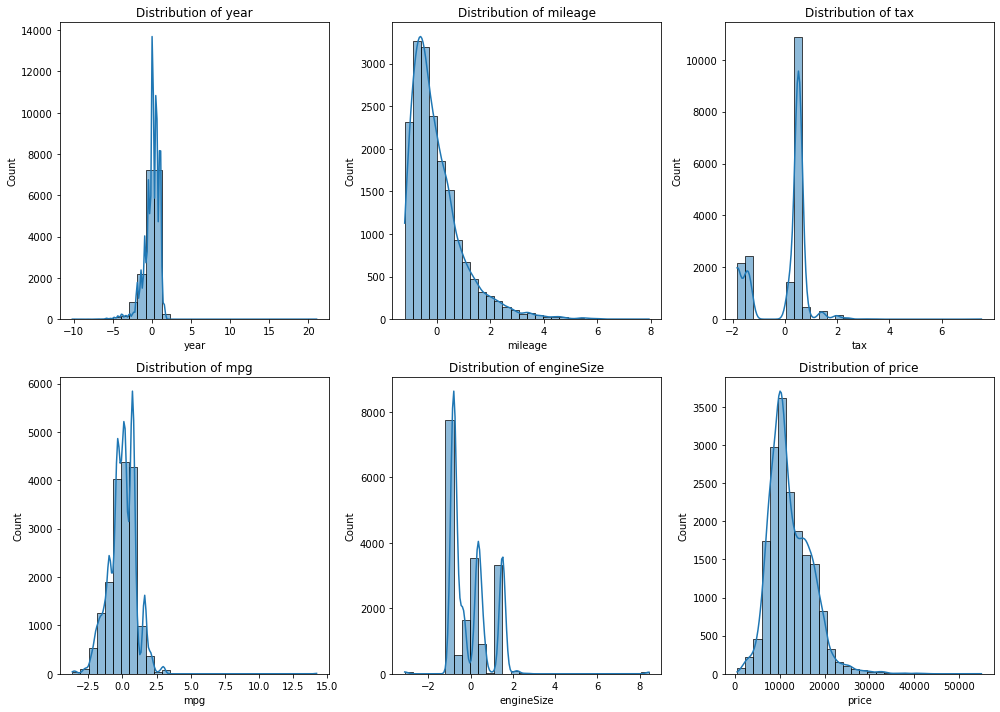

In [9]:
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

# histograms for numerical features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


The above histograms is for six numerical features: year, mileage, tax, mpg, engineSize, and price. These histograms provide insights into the distribution of each feature. For example, the distribution of year seems to be skewed right with a peak around 0. The distribution of mileage also shows a right skew, indicating that there are more cars with lower mileage than higher mileage. The tax distribution has a spike at around 0, suggesting a large number of cars have similar tax values. 

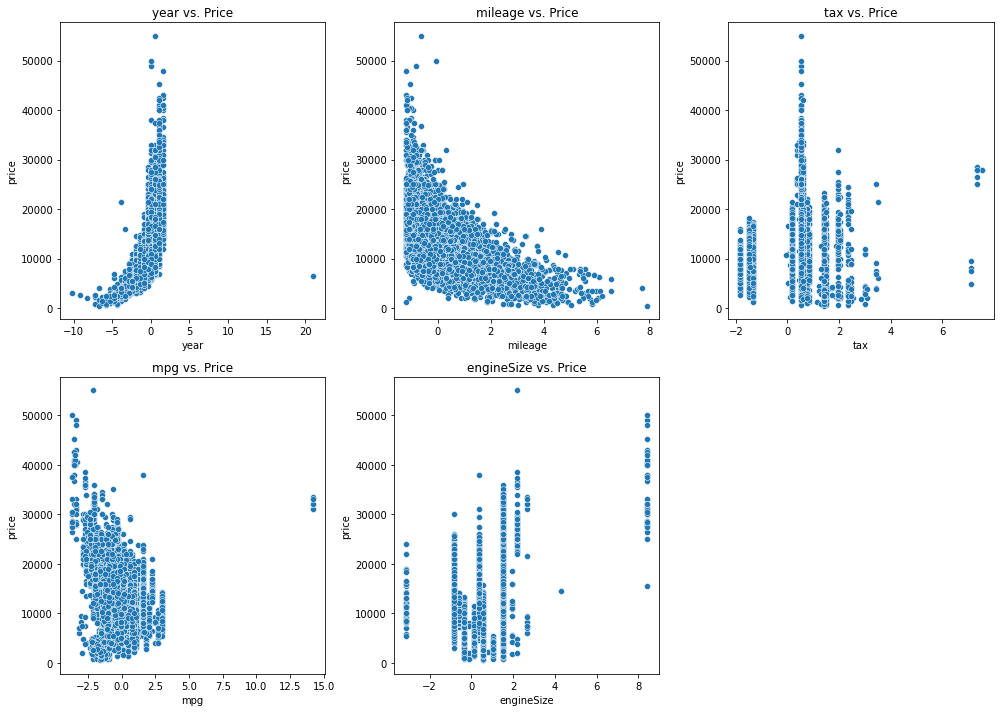

In [10]:
# scatter plots for numerical features vs. price
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features[:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

The scatter plots show the relationship between different features of cars and their prices. The plots suggest that there is a positive linear relationship between "year" and "price," meaning that newer cars tend to be more expensive. There is a negative linear relationship between "mileage" and "price," indicating that cars with higher mileage tend to be cheaper. "mpg" and "price" also show a negative linear relationship, meaning that cars with higher fuel efficiency tend to be less expensive. However, the relationship between "tax" and "price," "engineSize" and "price" are not clear, and there might be other factors influencing the price besides these features.

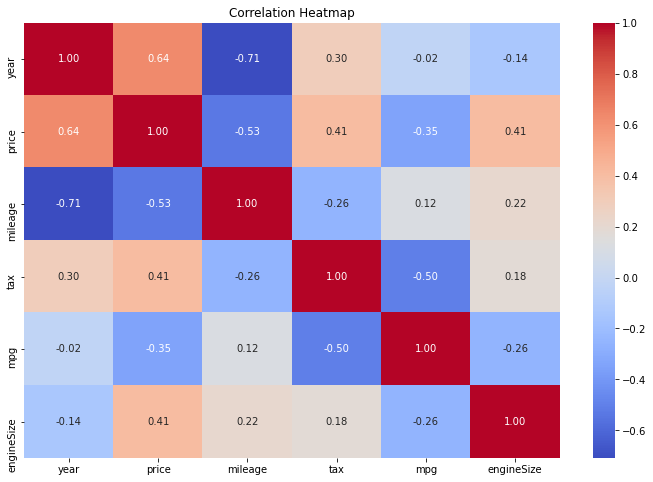

In [11]:
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows the correlation between different features of a car dataset. The color of each cell represents the strength of the correlation, with red indicating a strong positive correlation, blue indicating a strong negative correlation, and white indicating no correlation. For example, the strong positive correlation between "year" and "price" indicates that newer cars tend to be more expensive. On the other hand, the strong negative correlation between "mileage" and "price" indicates that cars with higher mileage tend to be cheaper. The heatmap can be used to identify relationships between different features and to inform decisions about which features to use in a machine learning model

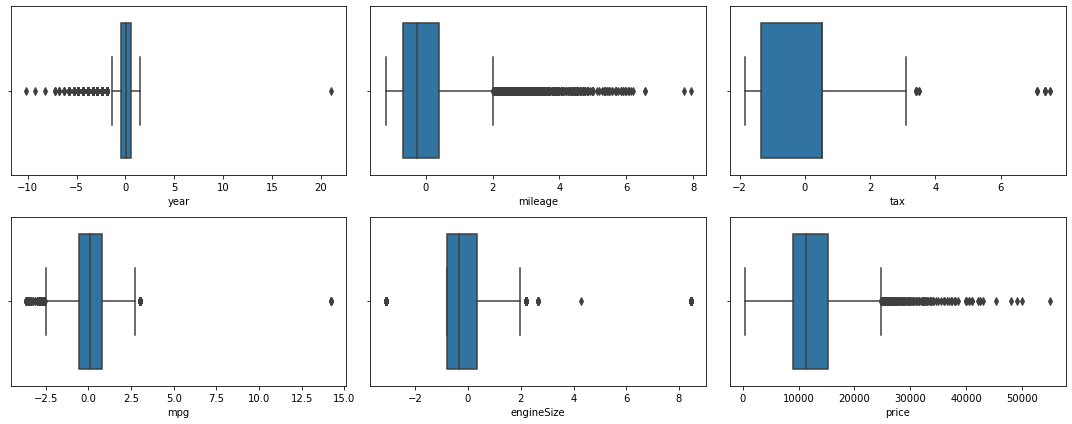

In [12]:
# box plots
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
plt.tight_layout()
plt.show()


The box plots show the distribution of the features year, mileage, tax, mpg and engineSize. We see that the data for all features is skewed towards the left, meaning that there are more data points at the lower end of the range. The box plot for year also shows several outliers, which are data points that are far away from the rest of the data. This suggests that the year feature may be highly variable, and that there may be some cars that are much older or much newer than the rest. The other box plots also show some outliers, but to a lesser extent. This indicates that the other features are more normally distributed, with less variability. However, we are not removing them because it might affect the accuracy because they are important values needed for the dataset. 

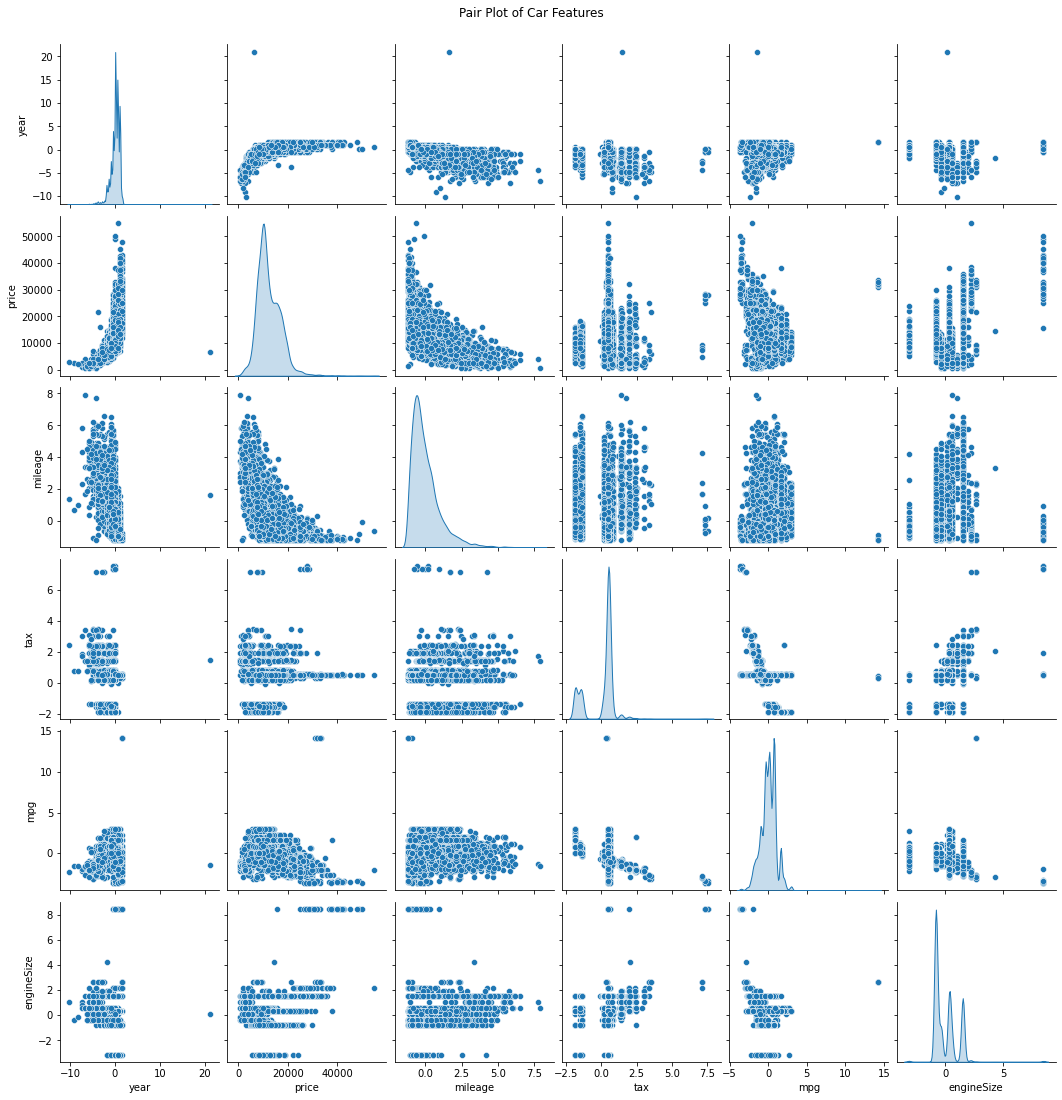

In [13]:
#Pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Car Features', y=1.02)
plt.show()

The pair plot reveals several key insights into the relationships between the numerical features of the car dataset. Most notably, there is a positive correlation between the car's year and price, indicating that newer cars tend to be more expensive. Conversely, a negative correlation exists between mileage and price, suggesting that cars with higher mileage are generally cheaper. The distributions show that most cars in the dataset are relatively new and have low mileage. The tax and engine size do not exhibit clear correlations with price, suggesting these factors might not significantly influence pricing. Additionally, slight negative correlations are observed between mpg and both mileage and price, indicating that cars with higher fuel efficiency and higher mileage might be less expensive. These insights can guide pricing, marketing, and inventory management strategies by focusing on car age and mileage as primary price determinants.

### Recommendations

1. **Focus on Newer Cars**: The positive correlation between the year of manufacture and the price suggests that newer cars tend to be more expensive. Therefore, dealerships and sellers should emphasize the age of the car as a key selling point. 
2. **Highlight Low Mileage**: The negative correlation between mileage and price indicates that cars with lower mileage are generally priced higher. Sellers should highlight the low mileage of their cars in advertisements, as it is an important factor for buyers seeking reliable and less-used vehicles
3. **Optimize Tax Rates**: The spike in the tax distribution histogram around 0 suggests that a large number of cars have similar tax values. Dealerships could consider offering incentives or discounts on cars with higher tax rates to make them more attractive to buyers. 
4. **Fuel Efficiency Considerations**: The negative correlation between mpg (miles per gallon) and price implies that cars with higher fuel efficiency tend to be less expensive. This might seem counterintuitive as fuel-efficient cars are often more desirable. Dealerships should investigate this further, possibly promoting fuel-efficient cars as cost-effective over the long term, especially for buyers concerned about fuel costs.
5. **Engine Size Marketing**: Larger engines  appeal to specific segments such as enthusiasts or those needing more power. Customizing marketing strategies to highlight engine size for these niches could be beneficial.
6. Reviewing and adjusting the pricing strategy to ensure that it is competitive with the market and aligned with the value proposition of the cars being sold.